In [2]:
import os
import sys
from typing import (
    List,
    Dict,
    Tuple,
    Union,
)
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

In [3]:
sys.path.append("../lib")

In [4]:
%load_ext autoreload
%autoreload 2

from util_opencv.image import (
    validate_image,
    get_image,
    save_image,
    get_image_dimensions,
    resize_image,
    show_image,
    show_image_opencv,
    resize_and_save_images,
    rotate,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

# Load image
## imraed(path, flags)
* [	cv.imread(	filename[, flags]) -> retval](https://docs.opencv.org/4.5.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)

> Parameters
> * filename	Name of file to be loaded.
> * flags	Flag that can take values of cv::ImreadModes

* [cv::ImreadModes](https://docs.opencv.org/4.5.4/d8/d6a/group__imgcodecs__flags.html)

In [4]:
help(cv.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

In [5]:
for attr in dir(cv):
    if attr.startswith("IMREAD"):
        print(attr)

IMREAD_ANYCOLOR
IMREAD_ANYDEPTH
IMREAD_COLOR
IMREAD_GRAYSCALE
IMREAD_IGNORE_ORIENTATION
IMREAD_LOAD_GDAL
IMREAD_REDUCED_COLOR_2
IMREAD_REDUCED_COLOR_4
IMREAD_REDUCED_COLOR_8
IMREAD_REDUCED_GRAYSCALE_2
IMREAD_REDUCED_GRAYSCALE_4
IMREAD_REDUCED_GRAYSCALE_8
IMREAD_UNCHANGED


# Display image

* [cv.imshow(winname, mat)](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563)

> Parameters
> * winname: Name of the window.
> * mat: Image to be shown.  
> 
> NOTE:  
> This function **should be followed by a call to cv::waitKey or cv::pollKey** to perform GUI housekeeping tasks that are necessary to actually show the given image and make the window respond to mouse and keyboard events. Otherwise, it won't display the image and the window might lock up. 


In [6]:
help(cv.imshow)

Help on built-in function imshow:

imshow(...)
    imshow(winname, mat) -> None
    .   @brief Displays an image in the specified window.
    .   
    .   The function imshow displays an image in the specified window. If the window was created with the
    .   cv::WINDOW_AUTOSIZE flag, the image is shown with its original size, however it is still limited by the screen resolution.
    .   Otherwise, the image is scaled to fit the window. The function may scale the image, depending on its depth:
    .   
    .   -   If the image is 8-bit unsigned, it is displayed as is.
    .   -   If the image is 16-bit unsigned, the pixels are divided by 256. That is, the
    .       value range [0,255\*256] is mapped to [0,255].
    .   -   If the image is 32-bit or 64-bit floating-point, the pixel values are multiplied by 255. That is, the
    .       value range [0,1] is mapped to [0,255].
    .   -   32-bit integer images are not processed anymore due to ambiguouty of required transform.
    .    

In [7]:
help(cv.waitKey)

Help on built-in function waitKey:

waitKey(...)
    waitKey([, delay]) -> retval
    .   @brief Waits for a pressed key.
    .   
    .   The function waitKey waits for a key event infinitely (when \f$\texttt{delay}\leq 0\f$ ) or for delay
    .   milliseconds, when it is positive. Since the OS has a minimum time between switching threads, the
    .   function will not wait exactly delay ms, it will wait at least delay ms, depending on what else is
    .   running on your computer at that time. It returns the code of the pressed key or -1 if no key was
    .   pressed before the specified time had elapsed. To check for a key press but not wait for it, use
    .   #pollKey.
    .   
    .   @note The functions #waitKey and #pollKey are the only methods in HighGUI that can fetch and handle
    .   GUI events, so one of them needs to be called periodically for normal event processing unless
    .   HighGUI is used within an environment that takes care of event processing.
    .   
    . 

# Resize Image

* [resize(src: ndarray, dsize: Tuple[int, int], dst: ndarray, fx: double, fy: double, interpolation: int](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

> * source: Input Image array (Single-channel, 8-bit or floating-point) 
> * dsize: Size of the output array as tuple. if None, 𝚍𝚜𝚒𝚣𝚎 = 𝚂𝚒𝚣𝚎(𝚛𝚘𝚞𝚗𝚍(𝚏𝚡*𝚜𝚛𝚌.𝚌𝚘𝚕𝚜), 𝚛𝚘𝚞𝚗𝚍(𝚏𝚢*𝚜𝚛𝚌.𝚛𝚘𝚠𝚜))
> * dst: Output array (Similar to the dimensions and type of Input image array) [optional]
> * fx: Scale factor along the horizontal axis. Wen it equals 0, (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜 [optional]
> * fy: Scale factor along the vertical axis. Wen it equals 0, (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜 [optional]
> * interpolation: One of the interpolation methods  [optional]

Choice of Interpolation Method for Resizing:

* INTER_AREA: This is used when we need to shrink an image.
* INTER_CUBIC: This is slow but more efficient.
* INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

In [8]:
for attr in dir(cv):
    if attr.startswith("INTER_"):
        print(attr)

INTER_AREA
INTER_BITS
INTER_BITS2
INTER_CUBIC
INTER_LANCZOS4
INTER_LINEAR
INTER_LINEAR_EXACT
INTER_MAX
INTER_NEAREST
INTER_NEAREST_EXACT
INTER_TAB_SIZE
INTER_TAB_SIZE2


---
# Examples

In [9]:
img: np.ndarray = get_image(path="./data/carbonara.jpg", flags=cv.IMREAD_COLOR)

In [11]:
width, height, depth = get_image_dimensions(img)
print(f"height, width, depth = {height}, {width}, {depth}")

height, width, depth = 512, 512, 3


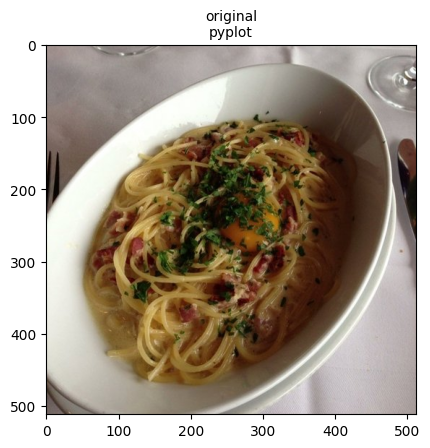

In [12]:
show_image(image=img, name="original\npyplot", show_axes=True)

### Resize image

In [13]:
resized: np.ndarray = resize_image(
    image=img,
    width=224,
    height=224,
    interpolation=cv.INTER_AREA
)

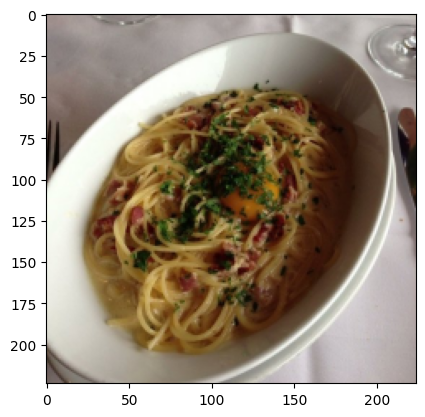

In [14]:
show_image(image=resized, show_axes=True)

### Resize and save images

In [26]:
resize_and_save_images(
    path_to_source="./data",
    pattern="*.jpg",
    height=234,
    width=234,
    path_to_destination="./resized"
)

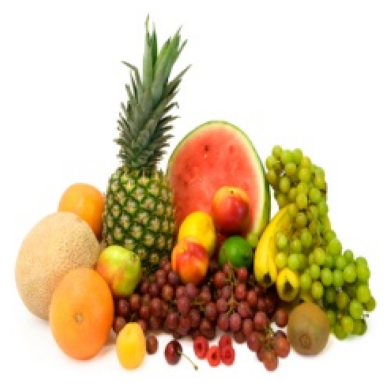

In [27]:
img: np.ndarray = get_image(path="./resized/fruits.jpg")
show_image(img)

In [25]:
get_image_dimensions(img)

(234, 234, 3)

---
# Orientation

* [How to Determine the Orientation of an Object Using OpenCV](https://automaticaddison.com/how-to-determine-the-orientation-of-an-object-using-opencv/)
* [How to find the orientation of an object (shape)? - Python Opencv](https://stackoverflow.com/questions/58632469/how-to-find-the-orientation-of-an-object-shape-python-opencv)

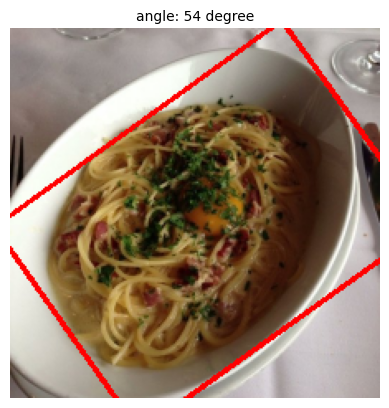

In [15]:
rotate(resized)

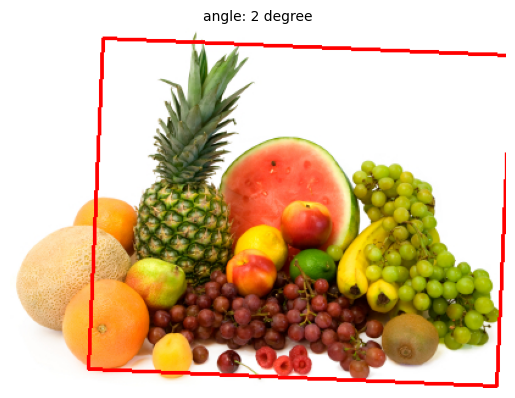

In [16]:
rotate(get_image("./data/fruits.jpg"))

---

# Classification by ResNet50

* [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50)
* [tf.keras.applications.resnet50.preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input)

> ```
> tf.keras.applications.resnet50.preprocess_input(
>    x, data_format=None
>)
> """
> Args:
>     x:  
>         A floating point numpy.array or a tf.Tensor, 3D or 4D with 3 color channels, 
>         with values in the range [0, 255]. The preprocessed data are written over 
>         the input data if the data types are compatible. To avoid this behaviour, 
>         numpy.copy(x) can be used.  
> Returns: Preprocessed numpy.array or a tf.Tensor with type float32.
> """
> ```

* [tf.keras.applications.resnet50.decode_predictions](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/decode_predictions)

> Returns: A list of lists of top class prediction tuples ```(class_name, class_description, score)```. One list of tuples per sample in batch input.


## Examples

* [Usage examples for image classification models - Classify ImageNet classes with ResNet50](https://keras.io/api/applications/#usage-examples-for-image-classification-models)

> ```
> from tensorflow.keras.applications.resnet50 import ResNet50
> from tensorflow.keras.preprocessing import image
> from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
> import numpy as np
> 
> model = ResNet50(weights='imagenet')
> 
> img_path = 'elephant.jpg'
> img = image.load_img(img_path, target_size=(224, 224))
> x = image.img_to_array(img)
> x = np.expand_dims(x, axis=0)
> x = preprocess_input(x)
> 
> preds = model.predict(x)
> # decode the results into a list of tuples (class, description, probability)
> # (one such list for each sample in the batch)
> print('Predicted:', decode_predictions(preds, top=3)[0])
> # Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]
> ```

In [ ]:
from keras.models import (
    Model, 
    Sequential
)

from tensorflow.keras.applications.resnet50 import (
    ResNet50,
    preprocess_input, 
    decode_predictions
)
from keras.preprocessing import image
import tensorflow as tf
import graphviz
import pydot

In [ ]:
def preprocess_rgb_image_for_resnet(image: np.ndarray):
    """Transform np array of an image to match the input format of Keras ResNet.
    * tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
    """
    # TF/Keras is batch based. Add the dimension for batch for an image of shape (244, 244, 3)
    validate_image(image)
    x = np.expand_dims(image,axis=0)
    
    # Make sure the data is compatible with TF (e.g. 32 bit float)
    return preprocess_input(x)

In [ ]:
model = ResNet50(weights='imagenet')

In [ ]:
model.summary()

In [ ]:
img: np.ndarray = resize_image(
    image=get_image(path="./data/carbonara.jpg", flags=cv.IMREAD_COLOR),
    width=224,
    height=224,
    interpolation=cv.INTER_AREA
)
x: np.ndarray = preprocess_rgb_image_for_resnet(img)

In [ ]:
predictions = model.predict(x)

In [ ]:
for pred in decode_predictions(predictions, top=3)[0]:  # [0] for the first image as TF handles in batch by default
    print(pred)

---

# Feature Extraction from ResNet50 

In [ ]:
feature_extractor = Model(
    inputs=model.input, 
    outputs=model.get_layer("avg_pool").output
)

In [ ]:
embedding = (feature_extractor(x)[0]).numpy()

In [ ]:
embedding.shape

In [ ]:
x = get_cosine_similarity(embedding, embedding)

In [ ]:
x.shape

In [ ]:
np.array(1).ndim

In [ ]:
import os
import sys

In [ ]:
sys.path.append("/Users/oonisim/home/repository/git/oonisim/python-programs/lib")

In [ ]:
%load_ext autoreload
%autoreload 2

from util_numpy import (
    is_all_close,
    get_cosine_similarity,
    get_orthogonal_vectors,
)

In [ ]:
import cv2 as cv
type(cv.INTER_LINEAR)

In [ ]:
cv.imwrite()